# Extra Marital Affairs In Kenya
## Data Source: [Kenya Open Data Portal](http://www.opendata.go.ke/)
### gyleodhis@outlook.com
### [@gyleodhis](https://www.twitter.com/gyleodhis)
### ![@gyleodhis](./data/kenya.png)
#### Licence:
You can use this code for anything you may wish only leave this page:
#### AS IS; HOW IS, WHERE IS

In this project Is seek to model features that contribute to extra marital affairs in Kenya. Specifically I try to answer the following questions:
1. What percentage of marraiges suffer from affairs
2. At what age do most couples start having affairs.
3. Relationship between religion and having an affair
4. Relationship between number of children and having an affair.
5. How many years into marriage will affairs begin.
6. Relationship between happiness and extra marital affairs among others.

### ... Of course its a Random Forest Simulation

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Marriage Issues").getOrCreate()

In [62]:
from IPython.display import display
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import pandas as pd
import numpy as np

In [3]:
df = spark.read.csv("./data/affairs.csv", inferSchema=True, header=True)
print((df.count(), len(df.columns)))

(6366, 6)


In [4]:
df.printSchema()

root
 |-- rate_marriage: integer (nullable = true)
 |-- age: double (nullable = true)
 |-- yrs_married: double (nullable = true)
 |-- children: double (nullable = true)
 |-- religious: integer (nullable = true)
 |-- affairs: integer (nullable = true)



The schema of our data is great. There are no string columns which need to be converted to numericals.

In [5]:
df.show(10, False)

+-------------+----+-----------+--------+---------+-------+
|rate_marriage|age |yrs_married|children|religious|affairs|
+-------------+----+-----------+--------+---------+-------+
|5            |32.0|6.0        |1.0     |3        |0      |
|4            |22.0|2.5        |0.0     |2        |0      |
|3            |32.0|9.0        |3.0     |3        |1      |
|3            |27.0|13.0       |3.0     |1        |1      |
|4            |22.0|2.5        |0.0     |1        |1      |
|4            |37.0|16.5       |4.0     |3        |1      |
|5            |27.0|9.0        |1.0     |1        |1      |
|4            |27.0|9.0        |0.0     |2        |1      |
|5            |37.0|23.0       |5.5     |2        |1      |
|5            |37.0|23.0       |5.5     |2        |1      |
+-------------+----+-----------+--------+---------+-------+
only showing top 10 rows



In [6]:
df.describe().select("summary","age","yrs_married","children","affairs").show(5, False)

+-------+------------------+-----------------+------------------+------------------+
|summary|age               |yrs_married      |children          |affairs           |
+-------+------------------+-----------------+------------------+------------------+
|count  |6366              |6366             |6366              |6366              |
|mean   |29.082862079798932|9.00942507068803 |1.3968740182218033|0.3224945020420987|
|stddev |6.847881883668817 |7.280119972766412|1.433470828560344 |0.467467779921086 |
|min    |17.5              |0.5              |0.0               |0                 |
|max    |42.0              |23.0             |5.5               |1                 |
+-------+------------------+-----------------+------------------+------------------+



##### The average age of people getting married is 29 years while most people by this age usually on average have been married for 9 years and  have only one child.

### How many married people have affairs

+-------+-----+
|affairs|count|
+-------+-----+
|      1| 2053|
|      0| 4313|
+-------+-----+



Text(0.5, 1.0, 'Married People with and Without affairs')

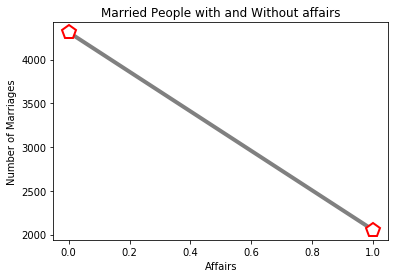

In [255]:
affairs_df =df.groupBy("affairs").count()
pandas_df = affairs_df.toPandas()
affairs_df.show()
labels = "Marriages Without Affairs", "Marriages with Affairs"
plt.plot(pandas_df['affairs'], pandas_df['count'], '-p', color='gray',markersize=15, label=labels,
         linewidth=4, markerfacecolor='white', markeredgecolor='red', markeredgewidth=2)
plt.xlabel("Affairs")
plt.ylabel("Number of Marriages")
plt.title("Married People with and Without affairs")

#### Roughly one in every three marriages is cought up in extra-marital affair.

+-------------+-----+
|rate_marriage|count|
+-------------+-----+
|            1|   99|
|            2|  348|
|            3|  993|
|            4| 2242|
|            5| 2684|
+-------------+-----+



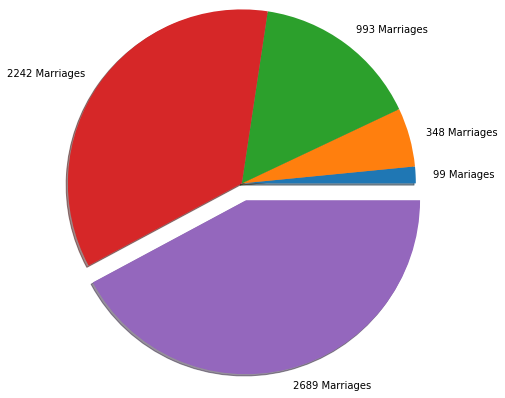

In [183]:
rates_df = df.groupBy("rate_marriage").count().orderBy("count", ascending=True)
rates_df_pandas = rates_df.toPandas()
labels = '99 Mariages', '348 Marriages', '993 Marriages', '2242 Marriages', '2689 Marriages'
explode = (0, 0, 0, 0, 0.2)
plt.pie(rates_df_pandas['count'],labels=labels, explode=explode, shadow=True, radius=2)

rates_df.show()

#### What do people mean when they rate their marriage as high(5) or low(1). Lets find out

+-------------+-------+-----+
|rate_marriage|affairs|count|
+-------------+-------+-----+
|            1|      0|   25|
|            1|      1|   74|
|            2|      0|  127|
|            2|      1|  221|
|            3|      0|  446|
|            3|      1|  547|
|            4|      0| 1518|
|            4|      1|  724|
|            5|      0| 2197|
|            5|      1|  487|
+-------------+-------+-----+



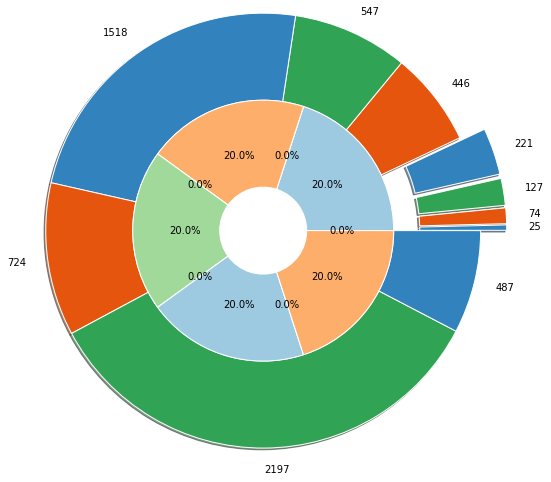

In [178]:
happiness_df = df.groupBy("rate_marriage", "affairs").count().orderBy("rate_marriage","affairs","count", ascending=True)
happiness_Pandas_df = happiness_df.toPandas()
happiness_df.show()
fig, ax = plt.subplots()
size = 1
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10,]))
explodeOuter = (0.3, 0.3, 0.3, 0.3, 0, 0, 0, 0, 0, 0)

ax.pie(happiness_Pandas_df['count'], radius=2.5, colors=outer_colors, labels=happiness_Pandas_df['count'],
       explode=explodeOuter, shadow=True, wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(happiness_Pandas_df['affairs'], radius=2.5-size, colors=inner_colors, autopct='%1.1f%%',
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal")
plt.show()

#### Clearly, the figures indicate a high percentage of people having affairs when rating their marriages low. This might prove to be a useful feature for the prediction.

In [215]:
religion_df = df.groupBy('religious','affairs').count().orderBy('religious','affairs','count',ascending=True)
religion_df.show()

+---------+-------+-----+
|religious|affairs|count|
+---------+-------+-----+
|        1|      0|  613|
|        1|      1|  408|
|        2|      0| 1448|
|        2|      1|  819|
|        3|      0| 1715|
|        3|      1|  707|
|        4|      0|  537|
|        4|      1|  119|
+---------+-------+-----+



#### That is very interesting most people who have affairs give very little ratings on religious matter.

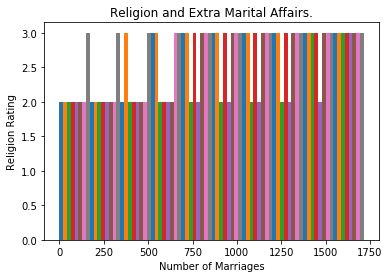

In [253]:
religion_df1 = religion_df.toPandas()
plt.hist(religion_df1, rwidth=3, cumulative=True)
plt.title("Religion and Extra Marital Affairs.")
plt.xlabel("Number of Marriages")
plt.ylabel("Religion Rating")
plt.show()

In [241]:
df.groupBy('children','affairs').count().orderBy('children','affairs','count',ascending=True).show()

+--------+-------+-----+
|children|affairs|count|
+--------+-------+-----+
|     0.0|      0| 1912|
|     0.0|      1|  502|
|     1.0|      0|  747|
|     1.0|      1|  412|
|     2.0|      0|  873|
|     2.0|      1|  608|
|     3.0|      0|  460|
|     3.0|      1|  321|
|     4.0|      0|  197|
|     4.0|      1|  131|
|     5.5|      0|  124|
|     5.5|      1|   79|
+--------+-------+-----+



#### The above computation gives a rough analogy that people who have affairs have less children than those who do not.

In [12]:
df.groupBy("affairs").mean().select("affairs","avg(age)","avg(yrs_married)","avg(children)","avg(religious)").show()

+-------+------------------+------------------+------------------+------------------+
|affairs|          avg(age)|  avg(yrs_married)|     avg(children)|    avg(religious)|
+-------+------------------+------------------+------------------+------------------+
|      1|30.537018996590355|11.152459814905017|1.7289332683877252| 2.261568436434486|
|      0| 28.39067934152562| 7.989334569904939|1.2388128912589844|2.5045212149316023|
+-------+------------------+------------------+------------------+------------------+



#### The above table gives a brief comparison between people with affairs and those whithout.
People who have been married for longer years tend to have extra-marital affairs.
Most people with affairs are way of above 30 years of age.

## Feature Engineering

In [13]:
# We need to assemble all the input columns into a single vector column
from pyspark.ml.feature import VectorAssembler

In [14]:
df_assembler = VectorAssembler(inputCols=['rate_marriage', 'age', 'yrs_married', 'children','religious'], outputCol="features")
df = df_assembler.transform(df)
df.printSchema()

root
 |-- rate_marriage: integer (nullable = true)
 |-- age: double (nullable = true)
 |-- yrs_married: double (nullable = true)
 |-- children: double (nullable = true)
 |-- religious: integer (nullable = true)
 |-- affairs: integer (nullable = true)
 |-- features: vector (nullable = true)



In [15]:
df.select("features", "affairs").show(5, False)

+-----------------------+-------+
|features               |affairs|
+-----------------------+-------+
|[5.0,32.0,6.0,1.0,3.0] |0      |
|[4.0,22.0,2.5,0.0,2.0] |0      |
|[3.0,32.0,9.0,3.0,3.0] |1      |
|[3.0,27.0,13.0,3.0,1.0]|1      |
|[4.0,22.0,2.5,0.0,1.0] |1      |
+-----------------------+-------+
only showing top 5 rows



#### To train our model, we willl use our  features column as input and affairs column as output.

In [16]:
model_df = df.select(["features","affairs"])

## Spliting the Data
We will split our data into 75%/25% for training and testing respectively

In [17]:
training, testing = model_df.randomSplit([0.75, 0.25])
print("training set:", training.count())
print("testing set:", testing.count())

training set: 4775
testing set: 1591


In [18]:
print ("Training set",training.groupBy("affairs").count().show())
print ("Testing set",testing.groupBy("affairs").count().show())

+-------+-----+
|affairs|count|
+-------+-----+
|      1| 1529|
|      0| 3246|
+-------+-----+

Training set None
+-------+-----+
|affairs|count|
+-------+-----+
|      1|  524|
|      0| 1067|
+-------+-----+

Testing set None


### Building and Training the Random Forest

In [19]:
from pyspark.ml.classification import RandomForestClassifier
rf_classifier=RandomForestClassifier(labelCol='affairs',numTrees=50).fit(training)

##### Let us now evaluate our test data

In [20]:
rf_predictions=rf_classifier.transform(testing)
rf_predictions.show()

+--------------------+-------+--------------------+--------------------+----------+
|            features|affairs|       rawPrediction|         probability|prediction|
+--------------------+-------+--------------------+--------------------+----------+
|[1.0,22.0,2.5,1.0...|      1|[25.7910841552114...|[0.51582168310422...|       0.0|
|[1.0,27.0,2.5,0.0...|      1|[24.5032835038649...|[0.49006567007729...|       1.0|
|[1.0,27.0,2.5,1.0...|      1|[25.2233406381254...|[0.50446681276250...|       0.0|
|[1.0,27.0,6.0,1.0...|      1|[18.1248431009489...|[0.36249686201897...|       1.0|
|[1.0,27.0,9.0,4.0...|      0|[14.7352022907610...|[0.29470404581522...|       1.0|
|[1.0,32.0,13.0,2....|      1|[12.5024631295587...|[0.25004926259117...|       1.0|
|[1.0,32.0,13.0,2....|      1|[12.5024631295587...|[0.25004926259117...|       1.0|
|[1.0,32.0,13.0,2....|      0|[14.4623377930365...|[0.28924675586073...|       1.0|
|[1.0,32.0,16.5,2....|      1|[13.7387875573808...|[0.27477575114761...|    

The first column in the predictions table is that of input features of the test data. The second column is the actual label or output of the test data. The third column (rawPrediction) represents the measure of confidence
for both possible outputs. The fourth column is that of conditional probability of each class label, and the final column is the prediction by the random forest classifier.We can apply a groupBy function on the prediction
column to find out the number of predictions made for the positive and negative classes.

In [21]:
rf_predictions.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|       0.0| 1292|
|       1.0|  299|
+----------+-----+



#### Let us now evalute these predictions

In [22]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

## Accuracy of our Model

In [23]:
rf_accuracy = MulticlassClassificationEvaluator(labelCol="affairs", metricName="accuracy").evaluate(rf_predictions)
print("The accuracy of our model is {0:.0%}".format(rf_accuracy))

The accuracy of our model is 72%


### Our Models Precision

In [24]:
rf_precision=MulticlassClassificationEvaluator(labelCol='affairs',metricName='weightedPrecision').evaluate(rf_predictions)
print("The precision rate on test data is {0:.0%}".format(rf_precision))

The precision rate on test data is 70%


Random Forests gives the importance of each feature in terms of predictive power, and it is very useful to figure out the critical variables that contribute the most to predictions.

In [25]:
rf_classifier.featureImportances

SparseVector(5, {0: 0.5358, 1: 0.0417, 2: 0.2355, 3: 0.0727, 4: 0.1143})

We used five features and the importance can be found out using the feature importance function. To know which input feature is mapped to which index values, we can use metadata information.

In [26]:
 df.schema["features"].metadata["ml_attr"]["attrs"]

{'numeric': [{'idx': 0, 'name': 'rate_marriage'},
  {'idx': 1, 'name': 'age'},
  {'idx': 2, 'name': 'yrs_married'},
  {'idx': 3, 'name': 'children'},
  {'idx': 4, 'name': 'religious'}]}

So, rate_marriage is the most important feature from a prediction standpoint followed by yrs_married. The least significant variable seems to be Age.

### Saving the Model for Future Use.

In [27]:
from pyspark.ml.classification import RandomForestClassificationModel
#rf_classifier.save("./classifier")
# Our model has been saved locally.


### Loading our model

In [28]:
rf = RandomForestClassificationModel.load("./classifier/")
#new_preditions=rf.transform(new_df)
#Uncoment the above line and replace (new_df) with your testing data.

##### That was my simple analysis of extra marital data in Kenya using Random Forests.

#### Hope it helps.
#### Bye.